Student Name: Ash Hoskins,#S559245 
Course: CSIS 44-609 - Data Analytics Fundamentals 
Professor Denise Case 
Domain: Geospatial Data Module 6 Project Date: 2/20/2023

Reference Link for USGS Data used in this program: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
Brief Description: This program reads in csv data from the Monthly Earthquake hazard program results and displays all detectable seizmic activity throughout the world for the last 30 days. 
Task 1 Requirements:
1.) Use Statistics mean, median, mode, std dev, variance
2.) built-in functions min, max, len, count of records, number of columns
3.) Get Data into a list
4.) Use filter, map and list comprehensions to clean and transform data
5.) use pandas
6.) use matplotlib
7.) Strive to tell a story

In [64]:
#Importing of necessar libraries for the program.
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [65]:
#Place csv data into a dataframe. 
df = pd.read_csv('MonthEQ.csv')

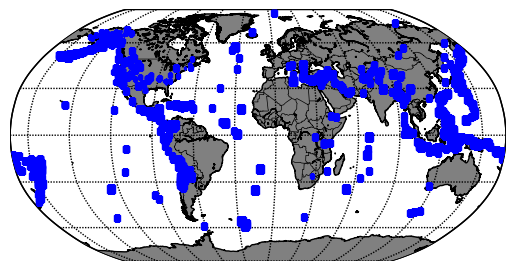

In [73]:
#Basemap creation criteria, centralized lat/lon on Atlantic Ocean. Draw Meridians and Paralells, coats lines, countries lines. For loop sets marker size based on magniture from dataframe
#This is created as method to be used for further tasks.  #x, y = worldmap(df["latitude"] ,df["longitude"]) Testing commented out for continuity of magnitude size.
def worldmap(data):
    worldmap = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=10, lon_0=-13)    
    worldmap.drawcoastlines()
    worldmap.drawcountries()
    worldmap.fillcontinents(color = 'gray')
    worldmap.drawmapboundary()
    worldmap.drawmeridians(np.arange(0, 360, 30))
    worldmap.drawparallels(np.arange(-90, 90, 30))
    
# For loop used to set marker size on the Basemap equal to the magnitude of the measurement. Ignored values below 0, errornous results.
    for longitude, latitude, mag in zip(data['longitude'], data['latitude'], data['mag']):
        if mag > 0:
            min_marker_size = mag
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'bs', markersize = min_marker_size)

plt.show(worldmap(df))

